In [7]:
import pandas as pd
import numpy as np

Dimensionality-reduced dataset saved to reduced_water_leakage.csv


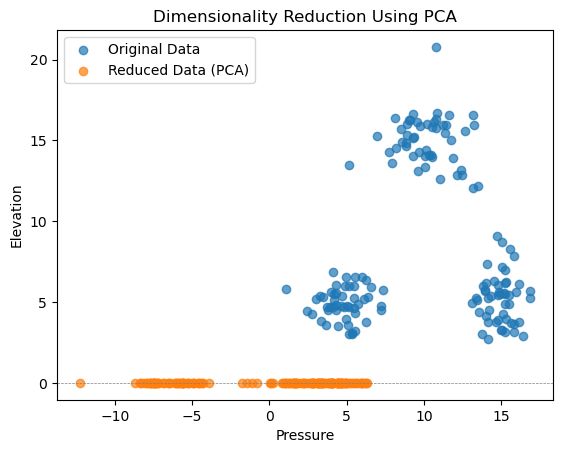

In [9]:
df = pd.read_csv("synthetic_water_leakage_with_labels.csv")

data = df[["Pressure", "Elevation"]].values

# PCA Implementation Without Built-In Functions
def calculate_mean(data):
    return np.mean(data, axis=0)

def center_data(data, mean):
    return data - mean

def calculate_covariance_matrix(data):
    return np.cov(data.T)

def calculate_eigenvalues_and_vectors(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors

def project_data(data, eigenvectors, num_components):
    return np.dot(data, eigenvectors[:, :num_components])

# Step-by-step PCA
mean = calculate_mean(data)
centered_data = center_data(data, mean)
cov_matrix = calculate_covariance_matrix(centered_data)
eigenvalues, eigenvectors = calculate_eigenvalues_and_vectors(cov_matrix)

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(-eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the top component (1D reduction in this case)
num_components = 1
reduced_data = project_data(centered_data, eigenvectors, num_components)

# Add reduced data to the original dataset
df["PCA_1"] = reduced_data
reduced_file_path = "reduced_water_leakage.csv"
df.to_csv(reduced_file_path, index=False)
print(f"Dimensionality-reduced dataset saved to {reduced_file_path}")

# Visualize Original vs Reduced Data
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], alpha=0.7, label='Original Data')
plt.scatter(reduced_data, np.zeros_like(reduced_data), alpha=0.7, label='Reduced Data (PCA)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Dimensionality Reduction Using PCA")
plt.xlabel("Pressure")
plt.ylabel("Elevation")
plt.legend()
plt.show()